<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Simple Linear Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Use scikit-learn to implement simple Linear Regression
-   Create a model, train,test and use the model


### Importing Needed packages


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [9]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN

#Use scikit-learn to implement simple Linear Regression
#Create a model, train,test and use the model

#Importing Needed packages
#-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-01-01 20:39:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-01-01 20:39:11 ERROR 404: Not Found.



**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [41]:
df = pd.read_csv("FuelConsumption.csv", skiprows=[1])

# take a look at the dataset
df.head()


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202.0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193.0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191.0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251.0
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260.0


In [42]:
print(df.columns)

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object')


In [43]:
df.rename(columns={"VEHICLE CLASS":"VEHICLE_CLASS", "ENGINE SIZE":"ENGINE_SIZE(L)", "FUEL":"FUEL_TYPE", "FUEL CONSUMPTION":"FUEL_CONS_CITY(L/100)"}, inplace=True)
df.head()

,YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY(L/100),Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202.0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193.0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191.0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251.0
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260.0


In [44]:
df.rename(columns={"Unnamed: 9":"FUEL_CONS_HWY(L/100)", "Unnamed: 10":"FUEL_CONS_COMB(L/100)", "Unnamed: 11":"FUEL_CONS_COMB(mpg)", "CO2 EMISSIONS ": "CO2_Emissions(g/km)"}, inplace=True)
df.head()

,YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY(L/100),FUEL_CONS_HWY(L/100),FUEL_CONS_COMB(L/100),FUEL_CONS_COMB(mpg),CO2_Emissions(g/km)
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202.0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193.0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191.0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251.0
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260.0


### Data Exploration

Lets first have a descriptive exploration on our data.


In [45]:
# summarize the data
df.describe()

,ENGINE_SIZE(L),CYLINDERS,FUEL_CONS_CITY(L/100),FUEL_CONS_HWY(L/100),FUEL_CONS_COMB(L/100),FUEL_CONS_COMB(mpg),CO2_Emissions(g/km)
count,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000
mean,3.347769,5.780904,13.196959,9.087013,11.346149,26.419153,261.757602
std,1.383725,1.641738,3.235520,2.249332,2.759598,6.709915,63.564076
min,1.000000,2.000000,5.400000,4.300000,4.900000,13.000000,113.000000
25%,2.200000,4.000000,10.800000,7.500000,9.400000,22.000000,216.000000
50%,3.000000,6.000000,12.900000,8.600000,11.000000,26.000000,253.000000
75%,4.300000,6.000000,15.100000,10.700000,13.100000,30.000000,304.000000
max,8.000000,12.000000,26.100000,16.100000,21.300000,58.000000,490.000000


Lets select some features to explore more.


In [51]:
cdf = df[['ENGINE_SIZE(L)','CYLINDERS','FUEL_CONS_COMB(mpg)','CO2_Emissions(g/km)']]
cdf.head(9)

,ENGINE_SIZE(L),CYLINDERS,FUEL_CONS_COMB(mpg),CO2_Emissions(g/km)
0,1.8,4.0,32.0,202.0
1,1.8,4.0,34.0,193.0
2,1.8,4.0,34.0,191.0
3,3.2,6.0,26.0,251.0
4,3.2,6.0,25.0,260.0
5,3.2,6.0,25.0,258.0
6,3.0,6.0,24.0,267.0
7,3.0,6.0,25.0,255.0
8,3.0,6.0,22.0,301.0


We can plot each of these fearues:


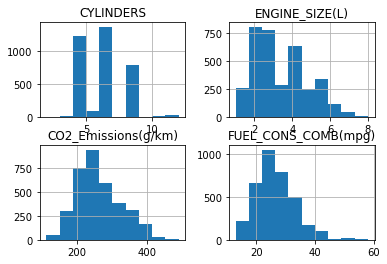

In [52]:
viz = cdf[['CYLINDERS','ENGINE_SIZE(L)','CO2_Emissions(g/km)','FUEL_CONS_COMB(mpg)']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:


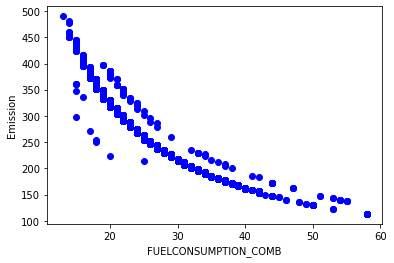

In [53]:
plt.scatter(cdf["FUEL_CONS_COMB(mpg)"], cdf["CO2_Emissions(g/km)"],  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

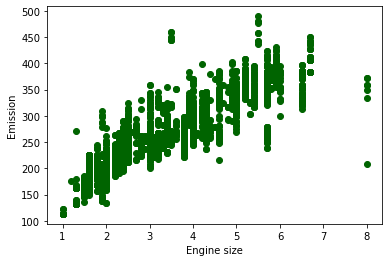

In [56]:
plt.scatter(cdf["ENGINE_SIZE(L)"], cdf["CO2_Emissions(g/km)"],  color='darkgreen')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relation:


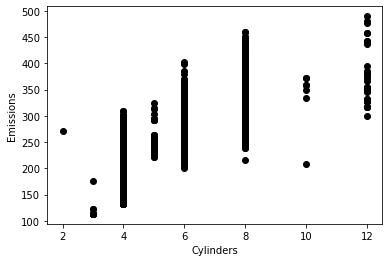

In [61]:
# write your code here
plt.scatter(cdf["CYLINDERS"], cdf["CO2_Emissions(g/km)"], color='black')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()



<details><summary>Click here for the solution</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using **np.random.rand()** function: 


In [62]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


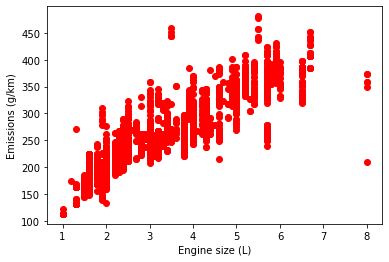

In [65]:
plt.scatter(train["ENGINE_SIZE(L)"], train["CO2_Emissions(g/km)"],  color='red')
plt.xlabel("Engine size (L)")
plt.ylabel("Emissions (g/km)")
plt.show()

#### Modeling

Using sklearn package to model data.


In [69]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train.dropna(inplace=True)
train_x = np.asanyarray(train[['ENGINE_SIZE(L)']])
train_y = np.asanyarray(train[['CO2_Emissions(g/km)']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[40.08225452]]
Intercept:  [127.72695189]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

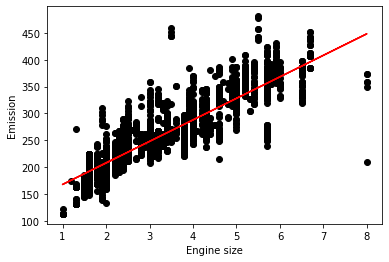

In [71]:
plt.scatter(train["ENGINE_SIZE(L)"], train["CO2_Emissions(g/km)"],  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```


In [73]:
from sklearn.metrics import r2_score

test.dropna(inplace=True)
test_x = np.asanyarray(test[['ENGINE_SIZE(L)']])
test_y = np.asanyarray(test[['CO2_Emissions(g/km)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.87
Residual sum of squares (MSE): 945.18
R2-score: 0.76


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed URL of the csv             |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |
|                   |         |               |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
